$$ 𝐉 = σ 𝐄 $$
$$ \dot{𝐃} = ε_r ε_0 \dot{𝐄} = ∇ × 𝐇 - 𝐉 \tag{1.19a}  $$
$$ μ_0 \dot{𝐇} = ∇ × 𝐄 \tag{1.19b} $$

$$ \dot{𝐃} = ε_r ε_0 \dot{𝐄} = ∇ × 𝐇 - σ 𝐄 $$

$$ \dot{D_x} = ε_r ε_0 \dot{E_x} = -(H_y)_z - σ E_x $$

$$ \tilde{E} = \sqrt{\frac{ε_0}{μ_0}} E \tag{1.5} $$

$$ \dot{\tilde{E_x}} = 
- \frac{1}{ε_r \sqrt{μ_0 ε_0}} (H_y)_z 
- \frac{σ}{ε_r ε_0} \tilde{E_x} 
\tag{1.20a} $$

$$ c_0 = \frac{1}{\sqrt{μ_0 ε_0}} $$

$$ \dot{H_y} = 
- \frac{1}{\sqrt{μ_0 ε_0}} (\tilde{E_x})_z = 
- c_0 (\tilde{E_x})_z 
\tag{1.20b} $$


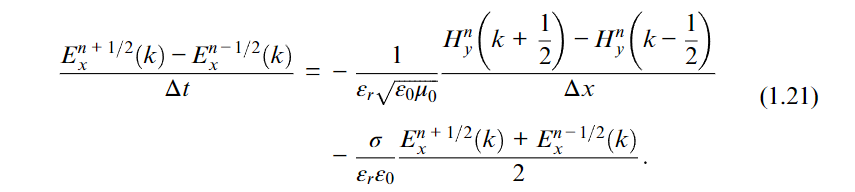

$$ \frac{1}{\sqrt{ε_0 μ_0}} \frac{Δt}{Δx} = 1/2 $$

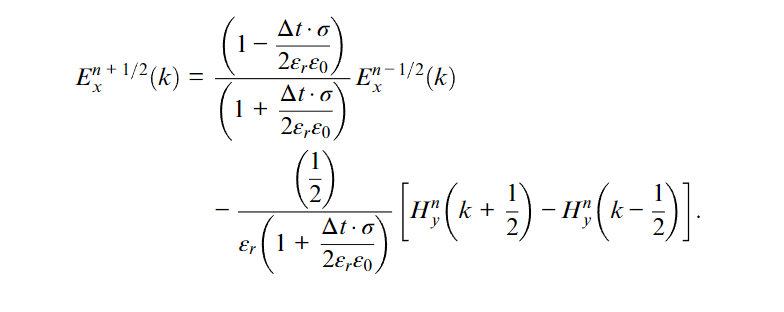

In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook, gridplot

output_notebook()

Loading BokehJS ...

In [6]:
ke = 200
nsteps = 500

Ex = np.zeros([nsteps, ke])
Hy = np.zeros([nsteps, ke])

ddx = 0.01  # cell size
dt = ddx / 6e8  # time step
freq_in = 700e6

bc_low = [0, 0]
bc_high = [0, 0]

# ε
epsz = 8.854e-12
eps = 4
sigma = 0.04

ca = np.ones(ke)
cb = np.ones(ke) * 0.5
cb_start = 100

eaf = dt * sigma / (2 * epsz * eps)
ca[cb_start:] = (1 - eaf) / (1 + eaf)
cb[cb_start:] = 0.5 / (eps * (1 + eaf))

# FDTD loop
for ts in range(1, nsteps):
    # Ex
    for k in range(1, ke):
        ts_n = ts - 1
        Ex[ts, k] = ca[k] * Ex[ts_n, k] + cb[k] * (Hy[ts_n, k - 1] - Hy[ts_n, k])

    # Sine
    pulse = np.sin(2 * np.pi * freq_in * dt * ts)
    Ex[ts, 5] = pulse + Ex[ts, 5]

    # BC
    Ex[ts, 0] = bc_low.pop(0)
    bc_low.append(Ex[ts, 1])
    Ex[ts, ke - 1] = bc_high.pop(0)
    bc_high.append(Ex[ts, ke - 2])

    # Hy
    for k in range(ke - 1):
        ts_n = ts - 1
        Hy[ts, k] = Hy[ts_n, k] + 0.5 * (Ex[ts, k] - Ex[ts, k + 1])

In [7]:
_fparams = dict(width=900, height=300, x_axis_label="Z", y_axis_label="t")
fig1 = figure(**_fparams)
fig2 = figure(**_fparams)

_params = dict(level="image", x=0, y=0, dw=ke, dh=nsteps, palette="Turbo256")

fig1.image(image=[Ex], **_params)
fig2.image(image=[Hy], **_params)

show(gridplot([[fig1], [fig2]]))